<a href="https://colab.research.google.com/github/MicahOleary/CatvsDog/blob/main/Cats_and_Dogs_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
#Loads the dataset from Kaggle
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /content/cats_and_dogs_filtered.zip

--2021-02-07 17:41:25--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 74.125.204.128, 64.233.189.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/content/cats_and_dogs_filtered.zip’

/content/cats_and_d 100%[===================>]  65.43M   120MB/s    in 0.5s    

2021-02-07 17:41:26 (120 MB/s) - ‘/content/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [80]:
#Imports python code to be able to use an OS library which gives access to the file system
import os
import zipfile

local_zip = '/content/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/content')
zip_ref.close()

In [81]:
base_dir = '/content/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')


# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


In [82]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.772.jpg', 'cat.691.jpg', 'cat.712.jpg', 'cat.471.jpg', 'cat.92.jpg', 'cat.396.jpg', 'cat.365.jpg', 'cat.542.jpg', 'cat.513.jpg', 'cat.671.jpg']
['dog.139.jpg', 'dog.591.jpg', 'dog.615.jpg', 'dog.158.jpg', 'dog.800.jpg', 'dog.92.jpg', 'dog.290.jpg', 'dog.239.jpg', 'dog.267.jpg', 'dog.916.jpg']


In [83]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))



total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [84]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

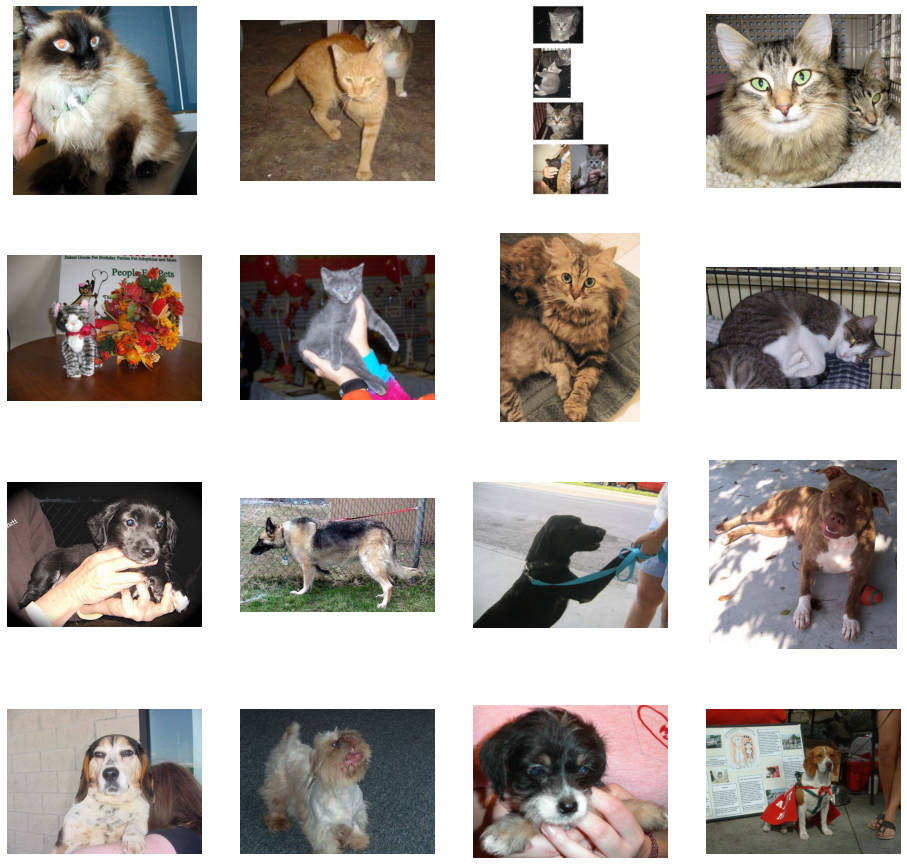

In [85]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') 

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [86]:
import tensorflow as tf
import keras
from keras.models import Sequential

In [88]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150  with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [89]:
#This makes a model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 18496)            

In [90]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [91]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255.,rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=32,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [92]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              batch_size=100,
                              epochs=20,
                              validation_steps=50,
                              verbose=2)

Epoch 1/20
63/63 - 62s - loss: 0.7334 - accuracy: 0.5500 - val_loss: 0.6708 - val_accuracy: 0.5710
Epoch 2/20
63/63 - 53s - loss: 0.6892 - accuracy: 0.5640
Epoch 3/20
63/63 - 53s - loss: 0.6664 - accuracy: 0.5945
Epoch 4/20
63/63 - 53s - loss: 0.6534 - accuracy: 0.6225
Epoch 5/20
63/63 - 53s - loss: 0.6557 - accuracy: 0.6060
Epoch 6/20
63/63 - 53s - loss: 0.6421 - accuracy: 0.6200
Epoch 7/20
63/63 - 53s - loss: 0.6339 - accuracy: 0.6440
Epoch 8/20
63/63 - 53s - loss: 0.6284 - accuracy: 0.6485
Epoch 9/20
63/63 - 53s - loss: 0.6141 - accuracy: 0.6605
Epoch 10/20
63/63 - 53s - loss: 0.6181 - accuracy: 0.6555
Epoch 11/20
63/63 - 53s - loss: 0.5951 - accuracy: 0.6790
Epoch 12/20
63/63 - 53s - loss: 0.6032 - accuracy: 0.6785
Epoch 13/20
63/63 - 53s - loss: 0.5785 - accuracy: 0.6870
Epoch 14/20
63/63 - 53s - loss: 0.5679 - accuracy: 0.6940
Epoch 15/20
63/63 - 53s - loss: 0.5803 - accuracy: 0.6985
Epoch 16/20
63/63 - 53s - loss: 0.5663 - accuracy: 0.6975
Epoch 17/20
63/63 - 54s - loss: 0.5626 

<Figure size 432x288 with 0 Axes>

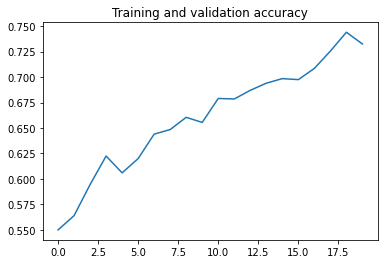

<Figure size 432x288 with 0 Axes>

In [93]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Get number of epochs

plt.plot(epochs, acc)
# plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.figure()

In [98]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")

Saving 11.10.16-People-Are-Doing-a-Double-Take-Over-This-Cat-Who-Looks-Like-a-Dog0.jpg to 11.10.16-People-Are-Doing-a-Double-Take-Over-This-Cat-Who-Looks-Like-a-Dog0.jpg
[0.]
11.10.16-People-Are-Doing-a-Double-Take-Over-This-Cat-Who-Looks-Like-a-Dog0.jpg is a cat


In [100]:
model.save('cats_and_dogs_small_2.h5')